# Feature Analysis Statistics
Provides various statistics about features in the context of a binary classifier. The study is limited to transcription factors (reglators).

In [1]:
import init
import common.constants as cn
import common_python.constants as ccn
from common.trinary_data import TrinaryData
from common.data_provider import DataProvider
import classifier.main_multi_classifier_feature_optimizer as main
from common.data_provider import DataProvider
from common_python.plots import util_plots
from plots import util_plots as xutil_plots
from common_python.classifier import feature_analyzer
from common_python.util import util

import datetime
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from sklearn import svm

%matplotlib inline

In [2]:
# These are the "long" data that have individual replications, not averages. And, only using TFs.
TRINARY = TrinaryData(is_averaged=False, is_dropT1=False, is_regulator=True)  # Trinary data
DF_X = TRINARY.df_X
SER_Y = TRINARY.ser_y
STATES = SER_Y.unique()
REGULATORS = DF_X.columns.tolist()
DATA_PATH = cn.PROJECT_DIR
for directory in ["data", "feature_analyzer"]:
    DATA_PATH = os.path.join(DATA_PATH, directory)
DATA_PATH_PAT = os.path.join(DATA_PATH, "main_feature_analyzer_%s_%d.csv") 
CLF = svm.LinearSVC()
ANALYZERS = feature_analyzer.makeFeatureAnalyzers(CLF, DF_X, SER_Y, data_path_pat=DATA_PATH_PAT)

In [3]:
# Non-zero regulators by state
def getNZRegulators():
    dct = {}
    for state in STATES:
        analyzer = ANALYZERS[state]
        df = util.pruneSmallValues(analyzer.getMetric(feature_analyzer.CPC))
        dct[state] = df.columns.tolist()
    return dct
NZ_REGULATOR_DCT = getNZRegulators()

In [4]:
ANALYZERS[0].df_cpc.head()

,Rv0022c,Rv0023,Rv0042c,Rv0047c,Rv0054,Rv0067c,Rv0078,Rv0081,Rv0117,Rv0135c,...,Rv3417c,Rv3557c,Rv3597c,Rv3676,Rv3830c,Rv3833,Rv3849,Rv3855,Rv3862c,Rv3911
feature1,,,,,,,,,,,,,,,,,,,,,
Rv0022c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rv0023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rv0042c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rv0047c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rv0054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Regulator Descriptive Statistics

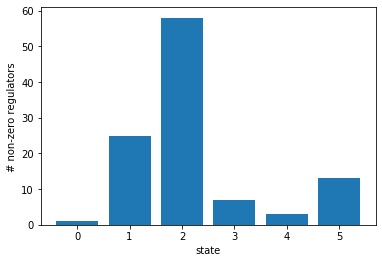

In [5]:
# Number of non-zero regulators by state
num_regulators = [len(NZ_REGULATOR_DCT[s]) for s in STATES]
plt.bar(STATES, num_regulators )
_ = plt.xlabel("state")
_ = plt.ylabel("# non-zero regulators")

In [6]:
NZ_REGULATOR_DCT[0]

['Rv1990c']

## Single Feature Accuracy (SFA)

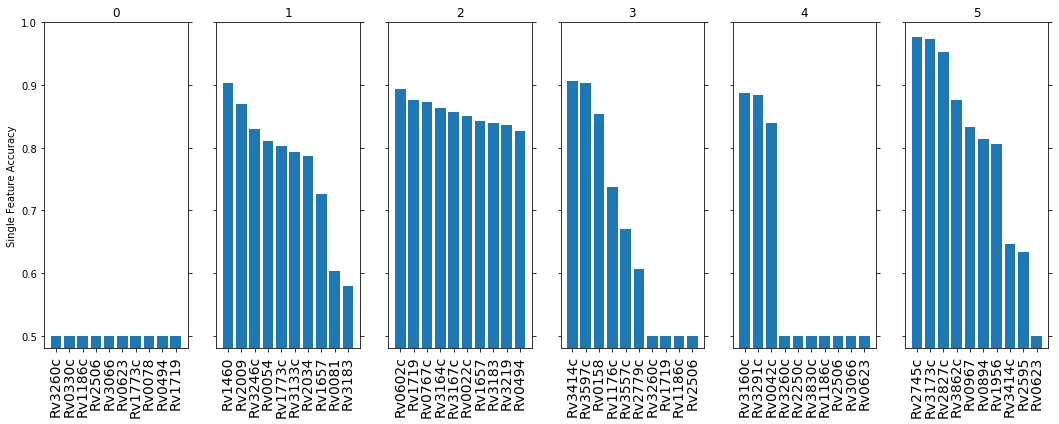

In [7]:
feature_analyzer.plotSFA(ANALYZERS)

# Classifier Prediction Correlation (CPC)
Delete rows and columns with 0 values.
Heat map for the remainder.

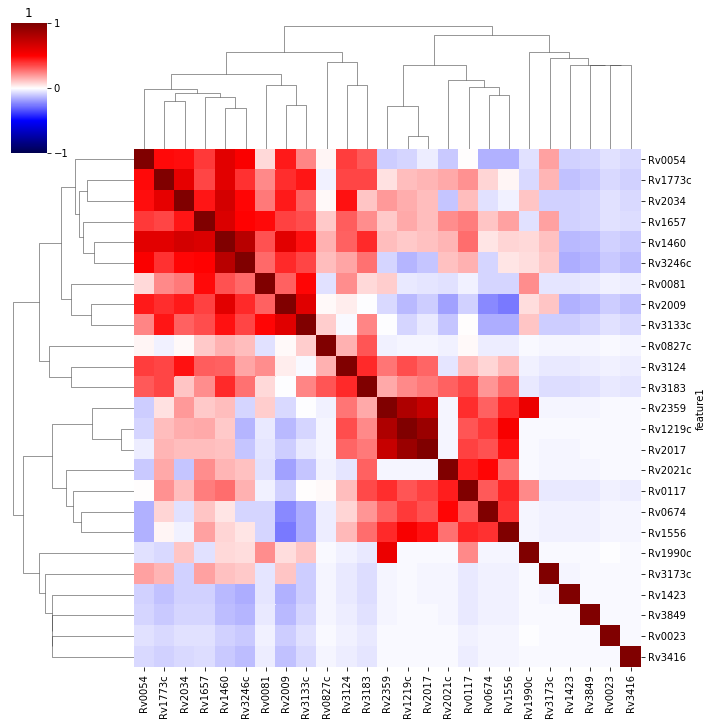

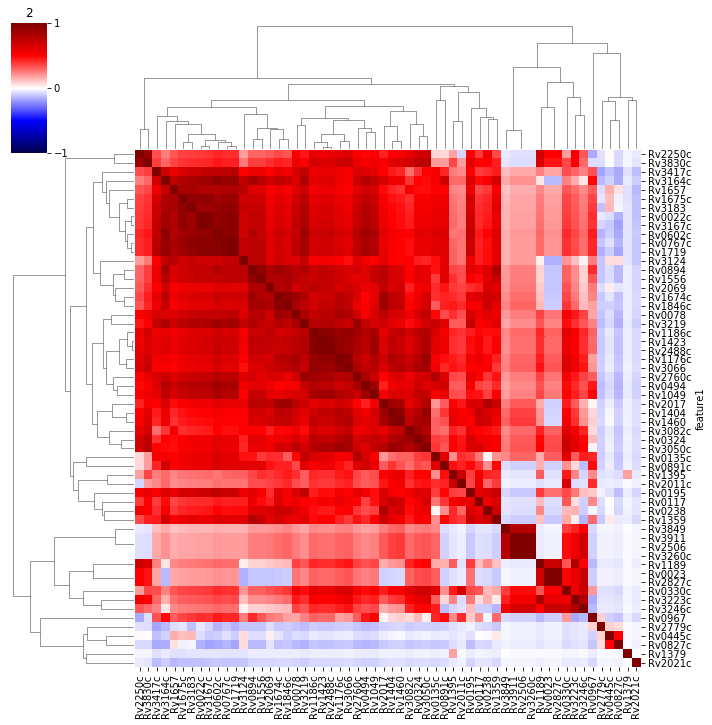

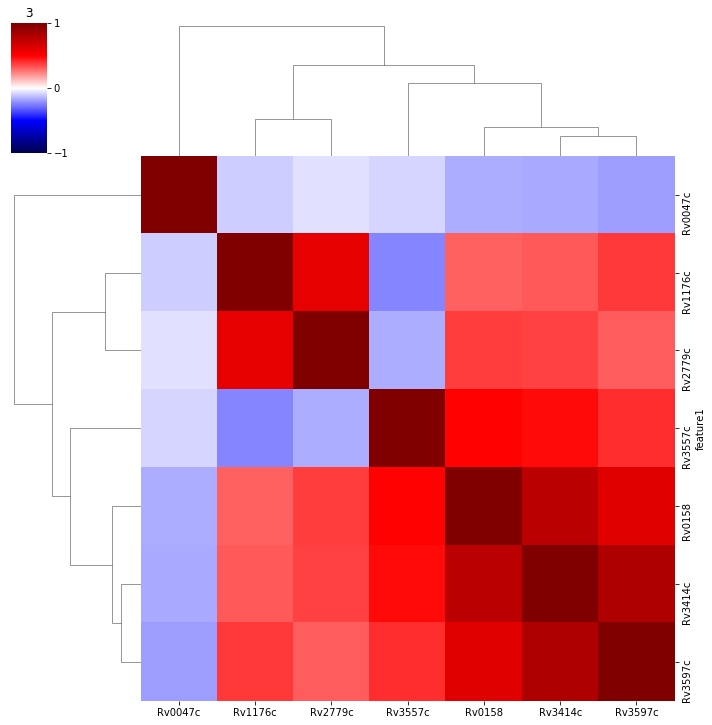

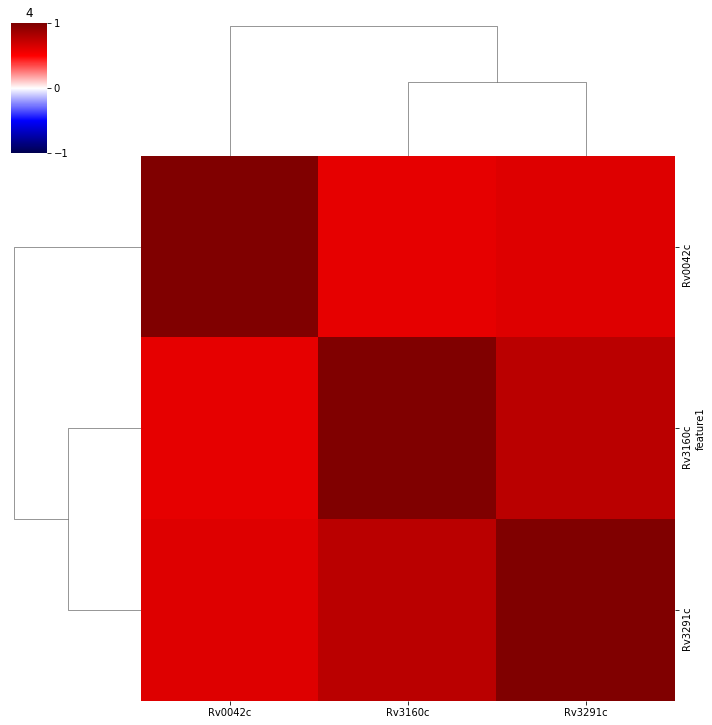

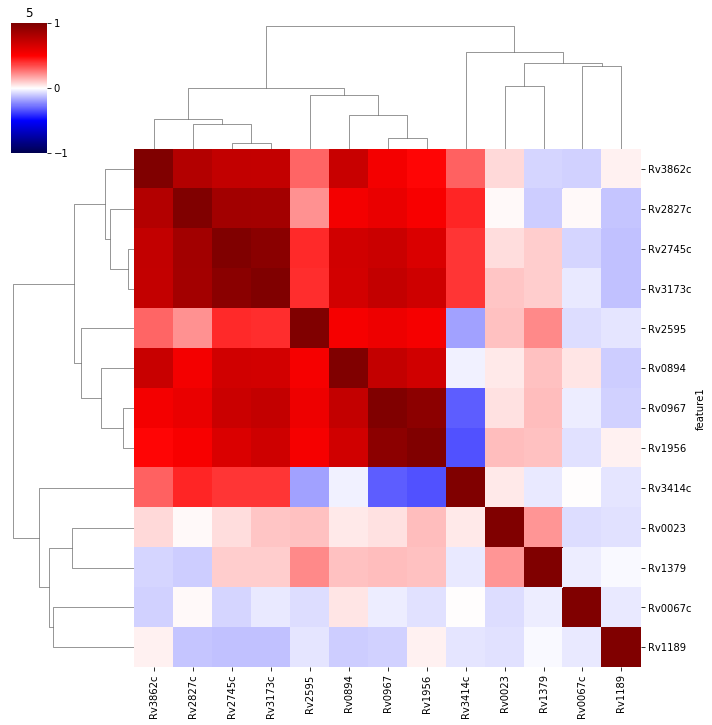

In [8]:
for state in STATES:
    #_ = plt.figure()
    analyzer = ANALYZERS[state]
    analyzer.plotCPC(title=str(state))

In state 2, Rv0602c has he largest SFA. However, this gene does not appear in the CPC matrix.

## Incremental Predication Accuracy (IPA)

**Issues**
1. Why aren't plots symmetric?
   1. Because rows and columns are not the same.

In [9]:
state = 1
analyzer = ANALYZERS[state]
df = util.pruneSmallValues(analyzer.getMetric(feature_analyzer.IPA))
len(df)

98

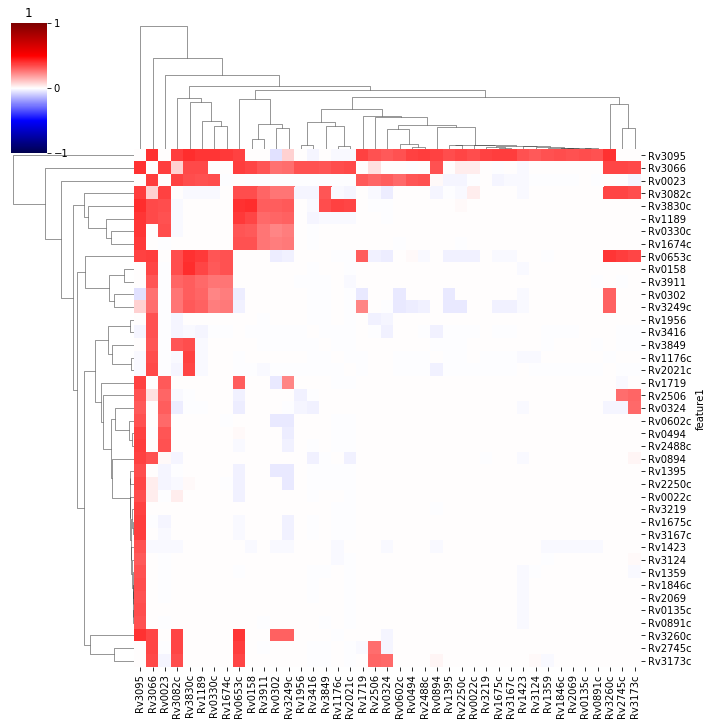

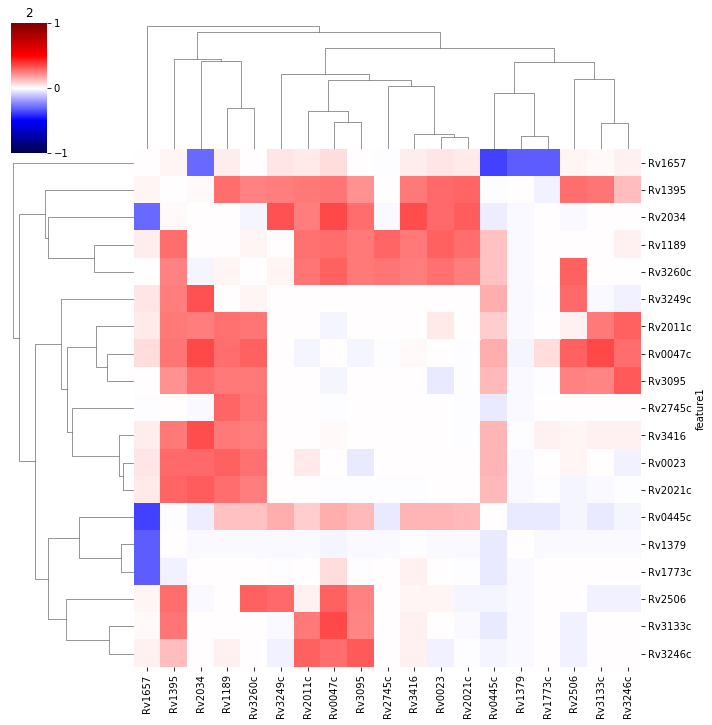

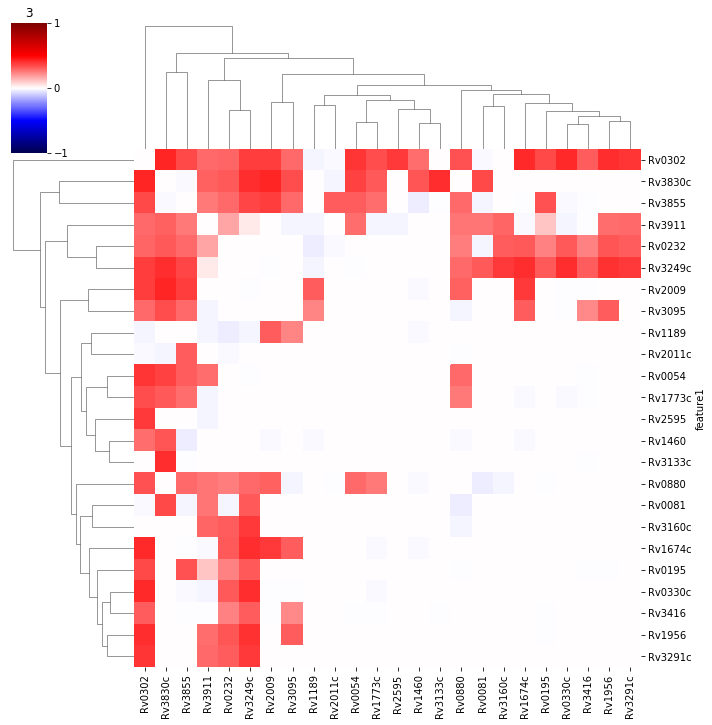

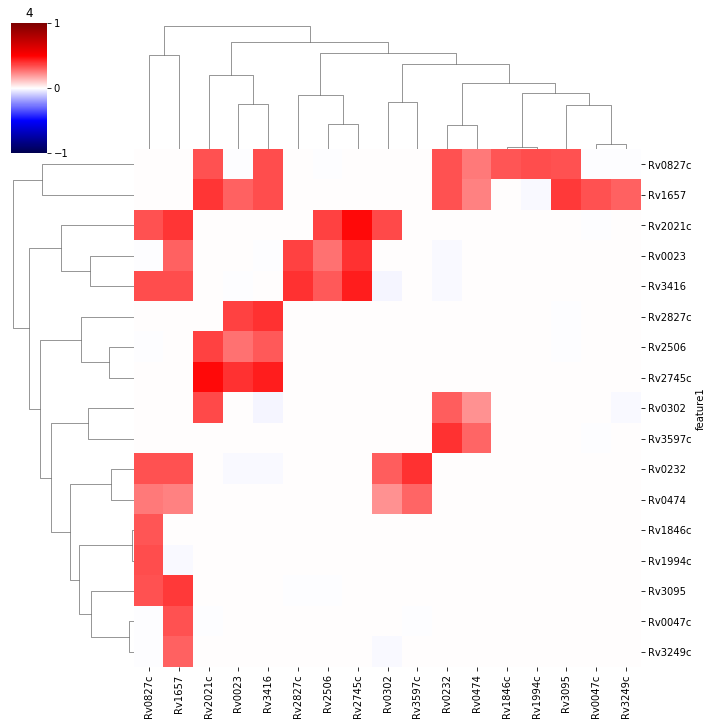

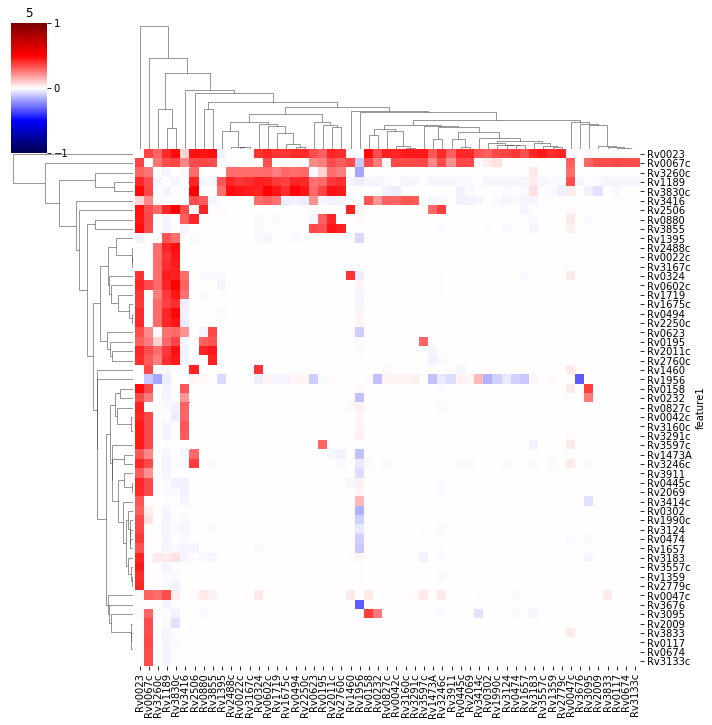

In [12]:
prune_func = lambda v: np.abs(v) < 0.3
for state in STATES:
    #_ = plt.figure()
    analyzer = ANALYZERS[state]
    analyzer.plotIPA(title=str(state), prune_func=prune_func)